In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pingouin as pg



In [3]:
eco_screen_zpsize_avg = pd.read_csv('Data/fig_1_2_3/eco_screen_pupil_zscore.csv',header=[0,1],index_col=[0])
eco_screen_zpsize_avg.columns = eco_screen_zpsize_avg.columns.map(lambda x: tuple(map(int, x)))
eco_screen_zpsize_avg_diff = (eco_screen_zpsize_avg.T - eco_screen_zpsize_avg.xs(0,level=1,axis=1).mean(axis=1).T).T
only_visual = pd.read_csv('Data/fig_1_2_3/video_response.csv',header=[0,1,2],sep=';',index_col=0)
only_visual.columns = only_visual.columns.map(lambda x: tuple((x[0],int(x[1]),int(x[2]))))
eco_zpsize_avg = pd.read_csv('Data/fig_1_2_3/eco_pupil_zscore.csv',header=[0,1],index_col=[0])
eco_zpsize_avg.columns = eco_zpsize_avg.columns.map(lambda x: tuple(map(int, x)))
eco_zpsize_avg_diff = (eco_zpsize_avg.T - eco_zpsize_avg.xs(0,level=1,axis=1).mean(axis=1).T).T

## Fig. 3 B

,Source,ddof1,ddof2,F,p-unc,np2,Contrast,A,B,Paired,Parametric,T,dof,alternative,BF10,hedges
0,mode,2.0,71.0,3.91,0.020,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,0.043,NaN,mode,Control,Occluder,False,True,2.066,56.809,two-sided,1.521,0.513
1,NaN,NaN,NaN,NaN,0.003,NaN,mode,Control,Vision Only,False,True,3.117,40.517,two-sided,11.676,0.753
2,NaN,NaN,NaN,NaN,0.238,NaN,mode,Occluder,Vision Only,False,True,1.202,33.071,two-sided,0.571,0.328


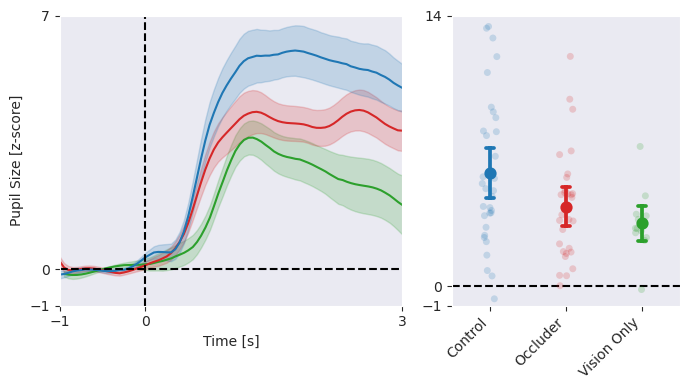

In [4]:

fig,ax = plt.subplots(1,2,figsize=(7,4),width_ratios=[0.6,0.4])
normal_diff = only_visual['normal'][4]-only_visual['normal'][0]
ax[0].plot(normal_diff.index, normal_diff.mean(axis=1), color='tab:green',label='Vision')
ax[0].fill_between(normal_diff.index, normal_diff.mean(axis=1)-normal_diff.sem(axis=1), normal_diff.mean(axis=1)+normal_diff.sem(axis=1), color='tab:green', alpha=0.2)

screen = eco_screen_zpsize_avg_diff.xs(1,level=1,axis=1).loc[-1:3]
ax[0].plot(screen.index, screen.mean(axis=1), color='tab:red',label='No vision')
ax[0].fill_between(screen.index, screen.mean(axis=1)-screen.sem(axis=1), screen.mean(axis=1)+screen.sem(axis=1), color='tab:red', alpha=0.2)


all_senses = eco_zpsize_avg_diff.xs(4,level=1,axis=1).loc[-1:3]
ax[0].plot(all_senses.index, all_senses.mean(axis=1), color='tab:blue',label='All')
ax[0].fill_between(all_senses.index, all_senses.mean(axis=1)-all_senses.sem(axis=1), all_senses.mean(axis=1)+all_senses.sem(axis=1), color='tab:blue', alpha=0.2)


all_senses_base = eco_zpsize_avg_diff.xs(0,level=1,axis=1).loc[-1:3]

ax[0].axhline(0,color='k',linestyle='--')
ax[0].axvline(0,color='k',linestyle='--')

ax[0].set_xlim([-1,3])
ax[0].legend(fontsize='small').remove()
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Pupil Size [z-score]')

toi = [1,2]
all_senses_peaks = pd.DataFrame(all_senses.loc[toi[0]:toi[1]].mean())
all_senses_peaks['mode']= 'Control'
all_senses_base_peaks = pd.DataFrame(all_senses_base.loc[toi[0]:toi[1]].mean())
all_senses_base_peaks['mode']= 'Baseline'
screen_peaks = pd.DataFrame(screen.loc[toi[0]:toi[1]].mean())
screen_peaks['mode'] = 'Occluder'
vision_only_peaks = pd.DataFrame(normal_diff.loc[toi[0]:toi[1]].mean()).infer_objects()
vision_only_peaks['mode'] = 'Vision Only'
modality = pd.concat([all_senses_peaks,screen_peaks,vision_only_peaks]) #,all_senses_base_peaks])
ax[1].axhline(0,color='k',linestyle='--')
sns.pointplot(data=modality, x='mode', hue='mode', y=0, linestyle='None', capsize=.1, palette=['tab:blue','tab:red','tab:green'],ax=ax[1])
sns.stripplot(data=modality, x='mode', hue='mode', y=0, linestyle='None', alpha=.2, palette=['tab:blue','tab:red','tab:green'],ax=ax[1])

ax[1].set_xlabel('')
ax[1].set_ylabel('Pupil Size [z-score]')

ticks = ax[1].get_xticks()
labels = [item.get_text() for item in ax[1].get_xticklabels()]
ax[1].set_xticks(ticks)
ax[1].set_xticklabels(labels, rotation=45, ha='right')

ylims = ax[0].get_ylim()
ax[0].set_ylim(np.round(ylims))
ax[0].set_yticks([np.round(ylims[0]),0,np.round(ylims[1])])

xlims = ax[0].get_xlim()
ax[0].set_xlim(np.round(xlims))
ax[0].set_xticks([np.round(xlims[0]),0,np.round(xlims[1])])

ylims = ax[1].get_ylim()
ax[1].set_ylim(np.round(ylims))
ax[1].set_yticks([np.round(ylims[0]),0,np.round(ylims[1])])

ax[0].grid(False)
ax[1].grid(False)

plt.tight_layout()

#from matplotlib.patches import Patch
#maps = list()
#cols = {'Control':'tab:blue', 'Occluder':'tab:red', 'Vision Only':'tab:green','Baseline':'tab:gray'}
#for i in cols.keys():
#    maps.append( Patch(facecolor=cols[i], label=i) )
#ax[1].legend(handles=maps, bbox_to_anchor=(1.6, 1))

ax[0].tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)
ax[1].tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)
ax[1].set_ylabel('')


plt.tight_layout()

anova_mod = pg.anova(modality,dv=0,between='mode').round(2)
ph_mode = pg.pairwise_tests(data=modality, dv=0,between='mode').round(3)

pd.concat([anova_mod, ph_mode])

Fig. 1 C

,Source,ddof1,ddof2,F,p-unc,np2,Contrast,A,B,Paired,Parametric,T,dof,alternative,BF10,hedges
0,level_1,2.0,33.0,14.322138,0.000033,0.46467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,0.024000,NaN,level_1,inv,ps,False,True,2.423,22.0,two-sided,2.732,0.955
1,NaN,NaN,NaN,NaN,0.009000,NaN,level_1,inv,up,False,True,-2.855,22.0,two-sided,5.476,-1.125
2,NaN,NaN,NaN,NaN,0.000000,NaN,level_1,ps,up,False,True,-5.457,22.0,two-sided,901.022,-2.151


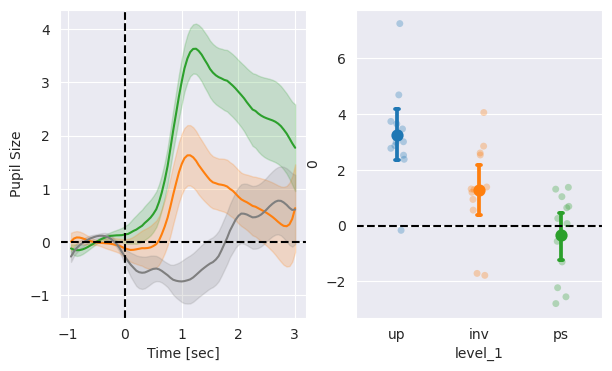

In [5]:


up_diff = only_visual['normal'][4]-only_visual['normal'][0]
inv_diff = only_visual['inverted'][4]-only_visual['inverted'][0]
ps_diff = only_visual['scrambled'][4]-only_visual['scrambled'][0]

up_diff_avg = up_diff.mean(axis=1)
inv_diff_avg = inv_diff.mean(axis=1)
ps_diff_avg = ps_diff.mean(axis=1)

up_diff_sem = up_diff.sem(axis=1)
inv_diff_sem = inv_diff.sem(axis=1)
ps_diff_sem = ps_diff.sem(axis=1)

fig,ax = plt.subplots(1,2,figsize=(7,4))
ax[0].plot(up_diff_avg.index,up_diff_avg,color='tab:green')
ax[0].fill_between(up_diff_avg.index, up_diff_avg-up_diff_sem, up_diff_avg+up_diff_sem, color='tab:green', alpha=0.2)
ax[0].plot(inv_diff_avg.index,inv_diff_avg,color='tab:orange')
ax[0].fill_between(inv_diff_avg.index, inv_diff_avg-inv_diff_sem, inv_diff_avg+inv_diff_sem, color='tab:orange', alpha=0.2)
ax[0].plot(ps_diff_avg.index,ps_diff_avg,color='tab:gray')
ax[0].fill_between(ps_diff_avg.index, ps_diff_avg-ps_diff_sem, ps_diff_avg+ps_diff_sem, color='tab:gray', alpha=0.2)
ax[0].axhline(0,color='k',linestyle='--')
ax[0].axvline(0,color='k',linestyle='--')

ax[0].set_ylabel('Pupil Size')
ax[0].set_xlabel('Time [sec]')

up_peaks = up_diff.loc[1:2].mean()
inv_peaks = inv_diff.loc[1:2].mean()
ps_peaks = ps_diff.loc[1:2].mean()

vis_mod = pd.concat([up_peaks,inv_peaks,ps_peaks],axis=1).rename(columns={0:'up',1:'inv',2:'ps'}).stack().reset_index()

sns.stripplot(data=vis_mod, x='level_1',y=0,hue='level_1',alpha=.3, ax=ax[1])
sns.pointplot(data=vis_mod, x='level_1',y=0,hue='level_1',capsize=.05, ax=ax[1])
ax[1].axhline(0,color='k',linestyle='--')

anova_vis_mod = pg.anova(vis_mod,dv=0,between='level_1')
anova_vis_mod_ph = pg.pairwise_tests(data=vis_mod, dv=0,between='level_1').round(3)
pd.concat([anova_vis_mod,anova_vis_mod_ph])